# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [90]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [91]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [92]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

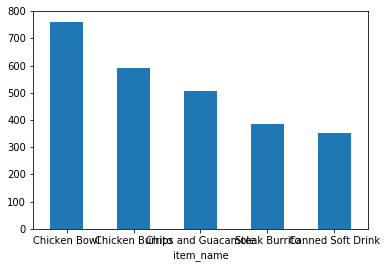

In [93]:
top5 = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False)[:5]
# top5.plot.bar(x='item_name', y='quantity')
top5['quantity'].plot.bar(rot=0)

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

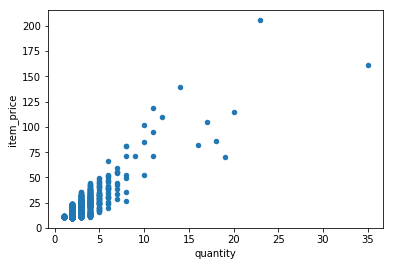

In [94]:
def dollarizer(x):
    if isinstance(x, str):
        return float(x[1:])
    return x

chipo['item_price'] = chipo['item_price'].apply(dollarizer)

scatterdf = chipo.groupby('order_id')[['quantity','item_price']].sum()
scatterdf.plot(kind='scatter', x='quantity', y='item_price')

### Step 7. BONUS: Create a question and a graph to answer your own question.
#### My question: Make a scatter plot of the number of characters in the choice_description and the total amount spent on the order

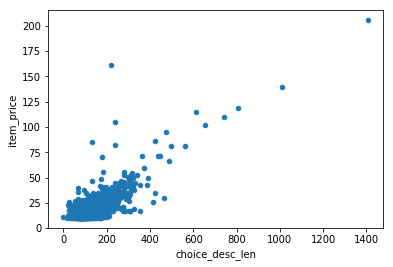

In [112]:
def desc_len(x):
    return len(x)

import ast

chipo['choice_desc_len'] = chipo.choice_description.fillna('').apply(len)
scatterdf2 = chipo.groupby('order_id').sum()
scatterdf2.plot(kind='scatter', x='choice_desc_len', y='item_price')